# Solving equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import fsolve

## I. Review: linear equations
To solve a system $\mathbf{Ax}=\mathbf{b}$ for $\mathbf{x}$, we do the following:
* Define the matrix $\mathbf{A}$ and the vector $\mathbf{b}$.
* Use x = np.linalg.solve(A,b)

**Example**

Solve 
$$\left[
\begin{array}[ccccc]
--2 & 1  & 0 & 0 & 0 \\
1  & -2 & 1 & 0 & 0 \\
0  &  1 & -2& 1 & 0 \\
0  &  0 & 1 & -2& 1 \\
0  &  0 & 0 & 1 & -2
\end{array}
\right]~
\left[
\begin{array}[c] \\x_0\\x_1\\x_2\\x_2\\x_4\end{array}\right] = 
\left[\begin{array}[c] \\1\\1\\1\\1\\1\end{array}\right]$$


In [2]:
# set up arrays for matrix A and vector b
A = np.array([[-2,1,0,0,0],[1,-2,1,0,0],[0,1,-2,1,0],[0,0,1,-2,1],[0,0,0,1,-2]])
b = np.ones(5)

x = np.linalg.solve(A,b)  # use efficient linear algebra solver
x


array([-2.5, -4. , -4.5, -4. , -2.5])

Here's a [link](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html) to more linear algebra operations.

## II. Nonlinear 1-D equations (1 equation in 1 unknown)

### Recall
* What are the key elements to solving nonlinear equations? (We did this in Excel!)
* List the parts, the form, and things you need.

### Exercise
* Before learning the details about solving equations using Python, see if you can guess how to solve the following equation using Python's solver ```fsolve```, based on what you need to solve equations:
$$f(x) = x^2-5.$$

In [3]:
from scipy.optimize import fsolve  # make fsolve directly accessible

def f(x):        
    return x**2 - 5

x_guess = 1
x = fsolve(f, x_guess)
print("x is",x)


# here's another way to program this using an advanced Python feature called a `lambda` function.
# It is a function that is anonymous (not named) because it is used only once inside another function:

x = fsolve(lambda x: x**2 - 5, x_guess)
print("As I said, x is",x)

x is [2.23606798]
As I said, x is [2.23606798]


Solving a nonlinear equation involves first putting it in the form $f(x)=0$. We know the function $f$ and we want to find the value of $x$ that gives $f(x)=0$.

To solve this, do the following:
* Define the function f(x)
* Set an initial guess for x.
* We need to import a library: ```from scipy.optimize import fsolve```
* Call the ```fsolve``` function: ```x = fsolve(f, x0)```
    * f is the name of the function you are solving, and x0 is your initial guess.
    * if f has arguments besides x that are constant, then use `x = fsolve(f, x0, args=(...))`
    


### Exercise

find the other root of the above function

In [4]:
x = fsolve(lambda x: x**2 - 5, -1)
x

array([-2.23606798])

### Exercise: This is Problem 1 on the homework

To find the power required to pump a fluid through a pipe we need a dimensionless quantity $f$ called the friction factor. The friction factor for turbulent flow in pipes can be found from the an empirical correlation called the Colebrook equation, 
$$\frac{1}{\sqrt{f}} = -2\log_{10}\left(\frac{\epsilon/D}{3.7}+\frac{2.51}{\mathrm{Re}\sqrt{f}}\right),$$
where $\mathrm{Re}$ is a dimensionless velocity called the Reynolds number and $\epsilon /D$ is the pipe roughness divided by the diameter (this ratio is also dimensionless). 

Make a smooth plot of $\mathrm{Re}$ vs. $f$ for $\epsilon /D=0.001$ and $10^3 \le \mathrm{Re} \le 10^8$. The horizontal axis for $\mathrm{Re}$ should be plotted logarithmically and $\mathrm{Re}$ should therefore be spaced logarithmically using the numpy logspace function. A semilog plot can be made from the command `plt.semilogx(x, y)` or `plt.semilogy(x, y)`

**Approach**
* Question: what are the different parts required? For example: how do you calculate $f$ when you know (or have assumed) values of $\epsilon /D$ and $\mathrm{Re}$?
* Start simple, then add more functionality, i.e. build one little machine at a time.
* Verify results at each step, i.e. get a function to work for one value before moving on and using it for many values or embedded in another function.

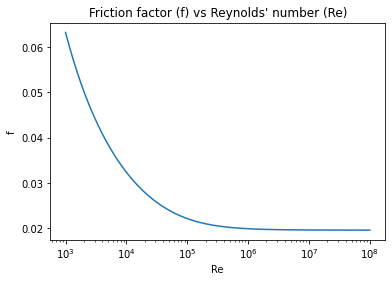

In [82]:
Re = np.logspace(3, 8, 200)
ϵ_by_D = 0.001
k = 3.7, 2.51

np.sqrt(10)

f = np.zeros(200)
for i in range(len(f)):
    f[i] = fsolve(lambda f: 1/np.sqrt(f) + 2*np.log10((ϵ_by_D/k[0]) + (k[1]/(Re[i]*np.sqrt(f)))), 0.01)
    
plt.title("Friction factor (f) vs Reynolds' number (Re)")
plt.ylabel("f")
plt.xlabel("Re")
plt.semilogx(Re, f);

### III. Multiple nonlinear equations in multiple unknowns
* What do we do if we are solving multiple equations in multiple unknowns?
* For example, suppose we have 
$$y+2z = 0$$
$$\sin(y)/z = 0$$

* How will you go about specifying the problem?
* What if there were three equations in three unknowns? Four and four?
* If you were coding ```fsolve``` how would you account for all these possibilities?

#### General approach
Instead of $f(x)=0$, we solve $\mathbf{f}(\mathbf{x})=\mathbf{0}$ ... the `fsolve` function won't mind at all 👍
* That is, $\mathbf{x}$ is a vector of unknowns, and $\mathbf{f}$ is a function that returns a vector
* Each element of $\mathbf{f}(\mathbf{x})$ is a single equation in our system of equations
* For instance, if we were solving a linear set of equations we could let $\mathbf{f}(\mathbf{x})=\mathbf{Ax-b}$


#### Details
* Consider again the **two functions** for the **two unknowns**: $h(y,z) = 0$, and $g(y,z)=0$ where
$$h(y,z)=y+2z,$$ $$g(y,z) = \sin(y)/z$$
* We would write these as $$f_0(x_0,x_1) = x_0+2x_1,$$ $$f_1(x_0,x_1) = \sin(x_0)/x_1,$$
which becomes: $$\left[\begin{matrix} f_0(x_0,x_1) \\ f_1(x_0,x_1)\end{matrix}\right] = \left[\begin{matrix}x_0+2x_1 \\ \sin(x_0)/x_1\end{matrix}\right] = \left[\begin{matrix}0 \\ 0\end{matrix}\right],$$
or $$\mathbf{f}(\mathbf{x}) = \left[\begin{matrix}x_0+2x_1 \\ \sin(x_0)/x_1\end{matrix}\right] = \mathbf{0},$$
that is, $$\mathbf{f}(\mathbf{x})=\mathbf{0}.$$

* We solve the system just like before:
    * Just define the vector function. It takes an array of unknowns $\mathbf{x}$, and returns an array of function values $\mathbf{f}$.
    * We use the same solver, but we give an array of initial guesses $\mathbf{x}_0$.


**Note** Here is a [link](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) to more information about the fsolve function with extra arguments that can give more control over the solution process.

### Exercise
* Solve the following two equations in two unknowns.
$$h(y,z)=y+2z,$$ 
$$g(y,z) = \sin(y)/z.$$
* Use $y_0=1$, and $z_0=2$ as an initial guess.

In [6]:
def hg(yz):
    y = yz[0]
    z = yz[1]
    
    h = y + 2*z
    g = np.sin(y)/z
    
    return np.array([h,g])

#---------------

yz_guess = np.array([1,2])

yz = fsolve(hg, yz_guess)

print("yz =", yz, "hg =", hg(yz))

yz = [ 9.42477796 -4.71238898] hg = [0.00000000e+00 4.82244674e-15]


### Exercise

Solve the following system of three equations in three unknowns:

$$x^2 + y^2 = 1,$$
$$xy + yz = -1.1,$$
$$y^2 + z^2 = 2.$$

A reasonable guess for all variables is $x=y=z=2.$


In [86]:
x̄_guess = np.array([2, 2, 2])
def f̄(x̄):
    res = np.zeros(3)
    res[0] = x̄[0]**2 + x̄[1]**2 - 1
    res[1] = x̄[0]*x̄[1] + x̄[1]*x̄[2] + 1.1
    res[2] = x̄[1]**2 + x̄[2]**2 - 2
    return res

x̄ = fsolve(f̄, x̄_guess)

print("The values of x, y and z, are {X:.2f}, {Y:.2f}, and {Z:.2f} respectively".format(
    X = x̄[0],
    Y = x̄[1],
    Z = x̄[2]
))

The values of x, y and z, are 0.10, -0.99, and 1.01 respectively
